## Samples collection from Archiver

In [1]:
import pandas as pd
import os
from sklearn.metrics import r2_score
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None)  
import joblib
from datetime import datetime
import warnings
import yaml
warnings.filterwarnings("ignore")
from utils import parse_pv_yml
from lume_model.utils import variables_from_yaml, variables_as_yaml
from lume_model.models import TorchModel, TorchModule
from lume_model.variables import ScalarInputVariable, ScalarOutputVariable

In [2]:
file_dir = '/sdf/data/ad/ard/u/zihanzhu/ml/lcls_fel_tuning/dataset/'

pickle_files = ['hxr_archiver_Feb_2024.pkl', 'hxr_archiver_Mar_2024.pkl', 'hxr_archiver_Apr_2024.pkl',
                'hxr_archiver_Jun_2024.pkl', 'hxr_archiver_May_2024.pkl',  'hxr_archiver_Sep_2024.pkl',
                'hxr_archiver_Oct_2024.pkl', 'hxr_archiver_Nov_2024.pkl']

dfs = [pd.read_pickle(file_dir+file) for file in pickle_files]
all_df = pd.concat(dfs, axis=0, ignore_index=False)

print('Number of total samples:', all_df.shape[0])

Number of total samples: 13648458


In [3]:
all_df.describe()

,QUAD:LI21:211:BCTRL,QUAD:LI21:221:BCTRL,QUAD:LI21:243:BCTRL,QUAD:LI21:251:BCTRL,QUAD:LI21:271:BCTRL,QUAD:LI21:335:BCTRL,QUAD:LI24:713:BCTRL,QUAD:LI24:740:BCTRL,QUAD:LI24:860:BCTRL,QUAD:LI24:892:BCTRL,QUAD:LI24:902:BCTRL,QUAD:CLTH:140:BCTRL,QUAD:CLTH:170:BCTRL,QUAD:BSYH:445:BCTRL,QUAD:LTUH:285:BCTRL,QUAD:LTUH:295:BCTRL,QUAD:LTUH:385:BCTRL,QUAD:LTUH:395:BCTRL,QUAD:LTUH:440:BCTRL,QUAD:LTUH:460:BCTRL,QUAD:LTUH:485:BCTRL,QUAD:LTUH:495:BCTRL,QUAD:LTUH:585:BCTRL,QUAD:LTUH:595:BCTRL,QUAD:LTUH:665:BCTRL,QUAD:DMPH:300:BCTRL,QUAD:DMPH:380:BCTRL,QUAD:DMPH:500:BCTRL,QUAD:DMPH:600:BCTRL,QUAD:BSYH:465:BCTRL,QUAD:BSYH:640:BCTRL,QUAD:BSYH:735:BCTRL,QUAD:BSYH:910:BCTRL,QUAD:LTUH:110:BCTRL,QUAD:LTUH:120:BCTRL,QUAD:LTUH:180:BCTRL,QUAD:LTUH:190:BCTRL,QUAD:LTUH:130:BCTRL,QUAD:LTUH:150:BCTRL,QUAD:LTUH:170:BCTRL,QUAD:LTUH:350:BCTRL,QUAD:LTUH:450:BCTRL,QUAD:LTUH:550:BCTRL,QUAD:LTUH:290:BCTRL,QUAD:LTUH:390:BCTRL,QUAD:LTUH:490:BCTRL,QUAD:LTUH:590:BCTRL,QUAD:LTUH:250:BCTRL,QUAD:LTUH:620:BCTRL,QUAD:LTUH:640:BCTRL,QUAD:LTUH:660:BCTRL,QUAD:LTUH:680:BCTRL,QUAD:LTUH:720:BCTRL,QUAD:LTUH:730:BCTRL,QUAD:LTUH:740:BCTRL,QUAD:LTUH:750:BCTRL,QUAD:LTUH:760:BCTRL,QUAD:LTUH:770:BCTRL,QUAD:LTUH:820:BCTRL,QUAD:LTUH:840:BCTRL,QUAD:LTUH:860:BCTRL,QUAD:LTUH:880:BCTRL,QUAD:UNDH:1380:BCTRL,QUAD:UNDH:1480:BCTRL,QUAD:UNDH:1580:BCTRL,QUAD:UNDH:1680:BCTRL,QUAD:UNDH:1780:BCTRL,QUAD:UNDH:1880:BCTRL,QUAD:UNDH:1980:BCTRL,QUAD:UNDH:2080:BCTRL,QUAD:UNDH:2180:BCTRL,QUAD:UNDH:2280:BCTRL,QUAD:UNDH:2380:BCTRL,QUAD:UNDH:2480:BCTRL,QUAD:UNDH:2580:BCTRL,QUAD:UNDH:2680:BCTRL,QUAD:UNDH:2780:BCTRL,QUAD:UNDH:2880:BCTRL,QUAD:UNDH:2980:BCTRL,QUAD:UNDH:3080:BCTRL,QUAD:UNDH:3180:BCTRL,QUAD:UNDH:3280:BCTRL,QUAD:UNDH:3380:BCTRL,QUAD:UNDH:3480:BCTRL,QUAD:UNDH:3580:BCTRL,QUAD:UNDH:3680:BCTRL,QUAD:UNDH:3780:BCTRL,QUAD:UNDH:3880:BCTRL,QUAD:UNDH:3980:BCTRL,QUAD:UNDH:4080:BCTRL,QUAD:UNDH:4180:BCTRL,QUAD:UNDH:4280:BCTRL,QUAD:UNDH:4380:BCTRL,QUAD:UNDH:4480:BCTRL,QUAD:UNDH:4580:BCTRL,QUAD:UNDH:4680:BCTRL,QUAD:LI21:201:BCTRL,QUAD:LI21:301:BCTRL,QUAD:LI24:701:BCTRL,QUAD:LI21:401:BCTRL,QUAD:LI21:501:BCTRL,QUAD:LI21:601:BCTRL,QUAD:LI21:701:BCTRL,QUAD:LI21:801:BCTRL,QUAD:LI21:901:BCTRL,QUAD:LI22:201:BCTRL,QUAD:LI22:301:BCTRL,QUAD:LI22:401:BCTRL,QUAD:LI22:501:BCTRL,QUAD:LI22:601:BCTRL,QUAD:LI22:701:BCTRL,QUAD:LI22:801:BCTRL,QUAD:LI22:901:BCTRL,QUAD:LI23:201:BCTRL,QUAD:LI23:301:BCTRL,QUAD:LI23:401:BCTRL,QUAD:LI23:501:BCTRL,QUAD:LI23:601:BCTRL,QUAD:LI23:701:BCTRL,QUAD:LI23:801:BCTRL,QUAD:LI23:901:BCTRL,QUAD:LI24:201:BCTRL,QUAD:LI24:301:BCTRL,QUAD:LI24:401:BCTRL,QUAD:LI24:501:BCTRL,QUAD:LI24:601:BCTRL,QUAD:LI24:702:BCTRL,QUAD:LI24:901:BCTRL,QUAD:LI25:201:BCTRL,QUAD:LI25:301:BCTRL,QUAD:LI25:401:BCTRL,QUAD:LI25:501:BCTRL,QUAD:LI25:601:BCTRL,QUAD:LI25:701:BCTRL,QUAD:LI25:801:BCTRL,QUAD:LI25:901:BCTRL,QUAD:LI26:201:BCTRL,QUAD:LI26:301:BCTRL,QUAD:LI26:401:BCTRL,QUAD:LI26:501:BCTRL,QUAD:LI26:601:BCTRL,QUAD:LI26:701:BCTRL,QUAD:LI26:801:BCTRL,QUAD:LI26:901:BCTRL,QUAD:LI27:201:BCTRL,QUAD:LI27:301:BCTRL,QUAD:LI27:401:BCTRL,QUAD:LI27:501:BCTRL,QUAD:LI27:601:BCTRL,QUAD:LI27:701:BCTRL,QUAD:LI27:801:BCTRL,QUAD:LI27:901:BCTRL,QUAD:LI28:201:BCTRL,QUAD:LI28:301:BCTRL,QUAD:LI28:401:BCTRL,QUAD:LI28:501:BCTRL,QUAD:LI28:601:BCTRL,QUAD:LI28:701:BCTRL,QUAD:LI28:801:BCTRL,QUAD:LI28:901:BCTRL,QUAD:LI29:201:BCTRL,QUAD:LI29:301:BCTRL,QUAD:LI29:401:BCTRL,QUAD:LI29:501:BCTRL,QUAD:LI29:601:BCTRL,QUAD:LI29:701:BCTRL,QUAD:LI29:801:BCTRL,QUAD:LI29:901:BCTRL,QUAD:LI30:201:BCTRL,QUAD:LI30:301:BCTRL,QUAD:LI30:401:BCTRL,QUAD:LI30:501:BCTRL,QUAD:LI30:601:BCTRL,QUAD:LI30:701:BCTRL,QUAD:LI30:801:BCTRL,QUAD:IN20:631:BCTRL,QUAD:IN20:651:BCTRL,QUAD:IN20:731:BCTRL,QUAD:IN20:771:BCTRL,QUAD:IN20:781:BCTRL,QUAD:LI21:131:BCTRL,QUAD:LI21:161:BCTRL,QUAD:LI21:278:BCTRL,QUAD:LI21:315:BCTRL,SOLN:IN20:111:BCTRL,SOLN:IN20:121:BCTRL,SOLN:IN20:311:BCTRL,QUAD:IN20:121:BCTRL,QUAD:IN20:122:BCTRL,QUAD:IN20:361:BCTRL,QUAD:IN20:371:BCTRL,QUAD:IN20:425:BCTRL,QUAD:IN20:441:BCTRL,QUAD:IN20:511:BCTRL,QUAD:IN20:525:BCTRL,ACCL:LI21:1:L1S_S_AV,ACCL:LI21:180:L1X_S_AV,ACCL:LI22:1:ADES,ACCL

## Samples filtering

In [4]:
# wider beam and photon energy 
def dataset_filter(dataset):
    # Filtering based on multiple conditions
    condition = (dataset['ACCL:LI21:1:L1S_S_PV'] < 0) & (dataset['ACCL:LI21:1:L1S_S_AV'] > 100) & \
                (dataset['ACCL:LI22:1:ADES'] > 3000) &  (dataset['ACCL:LI22:1:ADES'] < 5350) & \
                (dataset['XRMS on VCC'] > 300) & (dataset['XRMS on VCC'] < 350) & \
                (dataset['YRMS on VCC'] > 300) & (dataset['YRMS on VCC'] < 355) & \
                (dataset['hxr_pulse_intensity'] > 0.02) & (dataset['hxr_pulse_intensity'] < 5) & \
               (dataset['Charge at gun [pC]'] > 240) & (dataset['Charge at gun [pC]'] < 260) & \
                (dataset['Charge after BC1 [pC]'] < 200) & \
                (dataset['HXR electron energy [GeV]'] > 8) & (dataset['HXR photon energy [eV]'] > 7000)
                # all_df['hxr_pulse_intensity'] > 0.05)
    return dataset[condition]
                # (dataset['Bunch length at BC1'] > 200) & (dataset['Bunch length at BC1'] < 300) & \
                # (dataset['Bunch length at BC2'] > 3e3) & (dataset['Bunch length at BC2'] < 1e5) & \
 

In [5]:
final_df = dataset_filter(all_df)
print('Number of samples after filtering:', final_df.shape[0])
print('Features in samples:',final_df.keys())

Number of samples after filtering: 6747804
Features in samples: Index(['QUAD:LI21:211:BCTRL', 'QUAD:LI21:221:BCTRL', 'QUAD:LI21:243:BCTRL',
       'QUAD:LI21:251:BCTRL', 'QUAD:LI21:271:BCTRL', 'QUAD:LI21:335:BCTRL',
       'QUAD:LI24:713:BCTRL', 'QUAD:LI24:740:BCTRL', 'QUAD:LI24:860:BCTRL',
       'QUAD:LI24:892:BCTRL',
       ...
       'hxr_pulse_intensity', 'XRMS on VCC', 'YRMS on VCC',
       'Bunch length at BC1', 'Bunch length at BC2', 'Charge at gun [pC]',
       'Charge after BC1 [pC]', 'HXR electron energy [GeV]',
       'HXR photon energy [eV]', 'laser_iris_status'],
      dtype='object', length=213)


##### Remove these PVs whose settings never get changed

In [6]:
invalid_quad_list = []
for each in final_df.keys():
    # print(final_df[each].quantile([0,1]))
    if final_df[each].quantile(0) == final_df[each].quantile(1):
        invalid_quad_list.append(each)
        print(f'{each} should be removed')

QUAD:LI21:335:BCTRL should be removed
QUAD:LI24:902:BCTRL should be removed
QUAD:LTUH:295:BCTRL should be removed
QUAD:LTUH:385:BCTRL should be removed
QUAD:LTUH:395:BCTRL should be removed
QUAD:LTUH:485:BCTRL should be removed
QUAD:LTUH:495:BCTRL should be removed
QUAD:LTUH:585:BCTRL should be removed
QUAD:LTUH:595:BCTRL should be removed
QUAD:DMPH:600:BCTRL should be removed
QUAD:LTUH:150:BCTRL should be removed
QUAD:LTUH:170:BCTRL should be removed
QUAD:LTUH:350:BCTRL should be removed
QUAD:LTUH:450:BCTRL should be removed
QUAD:LTUH:550:BCTRL should be removed
QUAD:LTUH:390:BCTRL should be removed
QUAD:LTUH:490:BCTRL should be removed
QUAD:LTUH:590:BCTRL should be removed
QUAD:LTUH:730:BCTRL should be removed
QUAD:LTUH:740:BCTRL should be removed
QUAD:LTUH:750:BCTRL should be removed
QUAD:LTUH:760:BCTRL should be removed
QUAD:LTUH:770:BCTRL should be removed
QUAD:UNDH:1380:BCTRL should be removed
QUAD:UNDH:1480:BCTRL should be removed
QUAD:UNDH:1580:BCTRL should be removed
QUAD:UNDH

In [7]:
print(f'Feature number is: {final_df.shape[1]}')
final_df = final_df.drop(columns=invalid_quad_list)
print(f'After dropping invalid PVs\nFeature number is: {final_df.shape[1]}')

Feature number is: 213
After dropping invalid PVs
Feature number is: 153


## Distribution analysis for sample set



In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [9]:
quads_inj_bctrl = ['SOLN:IN20:121:BCTRL', 'QUAD:IN20:121:BCTRL', 'QUAD:IN20:122:BCTRL', 'QUAD:IN20:361:BCTRL', 'QUAD:IN20:371:BCTRL', 
             'QUAD:IN20:425:BCTRL', 'QUAD:IN20:441:BCTRL', 'QUAD:IN20:511:BCTRL', 'QUAD:IN20:525:BCTRL']
quads_linac_bctrl = ['QUAD:LI21:201:BCTRL', 'QUAD:LI21:211:BCTRL', 'QUAD:LI21:221:BCTRL', 'QUAD:LI21:251:BCTRL', 
               'QUAD:LI21:271:BCTRL', 'QUAD:LI21:278:BCTRL', 'QUAD:LI24:740:BCTRL', 'QUAD:LI24:860:BCTRL', 
               'QUAD:LI26:201:BCTRL', 'QUAD:LI26:301:BCTRL', 'QUAD:LI26:401:BCTRL', 'QUAD:LI26:501:BCTRL', 
               'QUAD:LI26:601:BCTRL', 'QUAD:LI26:701:BCTRL', 'QUAD:LI26:801:BCTRL', 'QUAD:LI26:901:BCTRL']
quads_ltuh_bctrl = ['QUAD:LTUH:440:BCTRL', 'QUAD:LTUH:460:BCTRL', 'QUAD:LTUH:620:BCTRL', 'QUAD:LTUH:640:BCTRL', 
              'QUAD:LTUH:660:BCTRL', 'QUAD:LTUH:680:BCTRL']
quads_ltus_bctrl = ['QUAD:LTUS:BCTRL', 'QUAD:LTUS:640:BCTRL', 'QUAD:LTUS:660:BCTRL', 'QUAD:LTUS:680:BCTRL']
quads_all_bctrl = quads_inj_bctrl + quads_linac_bctrl + quads_ltuh_bctrl + quads_ltus_bctrl
# get the BACT PV lists for quads
quads_inj_bact = [quad.replace("BCTRL", "BACT") for quad in quads_inj_bctrl] 
quads_linac_bact = [quad.replace("BCTRL", "BACT") for quad in quads_linac_bctrl] 
quads_ltuh_bact = [quad.replace("BCTRL", "BACT") for quad in quads_ltuh_bctrl] 
quads_ltus_bact = [quad.replace("BCTRL", "BACT") for quad in quads_ltus_bctrl] 

vcc_profile = ['CAMR:IN20:186:XRMS', 'CAMR:IN20:186:YRMS']
RF_ampls = ['ACCL:LI21:1:L1S_S_AV', 'ACCL:LI21:180:L1X_S_AV', 'ACCL:LI22:1:ADES', 'ACCL:LI25:1:ADES']
RF_phases = ['ACCL:LI21:1:L1S_S_PV', 'ACCL:LI21:180:L1X_S_PV', 'ACCL:LI22:1:PDES', 'ACCL:LI25:1:PDES']
blen = ['BLEN:LI21:265:AIMAX1H', 'BLEN:LI24:886:BIMAX1H']
bcharge = ['SIOC:SYS0:ML00:CALC038', 'SIOC:SYS0:ML00:CALC252'] # at gun, after BC1 # ['BPMS:IN20:221:TMIT1H', 'BPMS:LI21:233:TMIT1H', 'BPMS:LI24:801:TMIT1H'] # at gun, BC1, BC2 
hxr_energy = ['BEND:DMPH:400:BACT','SIOC:SYS0:ML00:AO627'] # beam energy, photon energy
sxr_energy = ['BEND:DMPS:400:BDES','SIOC:SYS0:ML00:AO628']
hxr_intensity = ['GDET:FEE1:241:ENRC1H'] #, 'SIOC:SYS0:ML00:AO627'] # number of photon, photon energy
laser_iris_status = ['IRIS:LR20:130:CONFG_SEL'] # the number of states represents the iris size: 1 [1.8mm], 2 [1.6mm], 3 [1.4mm], 4 [1.2mm], 5 [1.1mm], 6 [1.0mm], 7 [0.8mm]

undh_corr_x = ['XCOR:UNDH:1380:BCTRL', 'XCOR:UNDH:1480:BCTRL', 'XCOR:UNDH:1580:BCTRL', 'XCOR:UNDH:1680:BCTRL',
                 'XCOR:UNDH:1780:BCTRL', 'XCOR:UNDH:1880:BCTRL', 'XCOR:UNDH:1980:BCTRL', 'XCOR:UNDH:2080:BCTRL',
                 'XCOR:UNDH:2180:BCTRL', 'XCOR:UNDH:2280:BCTRL', 'XCOR:UNDH:2380:BCTRL', 'XCOR:UNDH:2480:BCTRL',
                 'XCOR:UNDH:2580:BCTRL', 'XCOR:UNDH:2680:BCTRL', 'XCOR:UNDH:2780:BCTRL', 'XCOR:UNDH:2880:BCTRL',
                 'XCOR:UNDH:2980:BCTRL', 'XCOR:UNDH:3080:BCTRL', 'XCOR:UNDH:3180:BCTRL', 'XCOR:UNDH:3280:BCTRL',
                 'XCOR:UNDH:3380:BCTRL', 'XCOR:UNDH:3480:BCTRL', 'XCOR:UNDH:3580:BCTRL', 'XCOR:UNDH:3680:BCTRL',
                 'XCOR:UNDH:3780:BCTRL', 'XCOR:UNDH:3880:BCTRL', 'XCOR:UNDH:3980:BCTRL', 'XCOR:UNDH:4080:BCTRL',
                 'XCOR:UNDH:4180:BCTRL', 'XCOR:UNDH:4280:BCTRL', 'XCOR:UNDH:4380:BCTRL', 'XCOR:UNDH:4480:BCTRL',
                 'XCOR:UNDH:4580:BCTRL', 'XCOR:UNDH:4680:BCTRL', 'XCOR:UNDH:4780:BCTRL']
undh_corr_y = ['YCOR:UNDH:1380:BCTRL', 'YCOR:UNDH:1480:BCTRL', 'YCOR:UNDH:1580:BCTRL', 'YCOR:UNDH:1680:BCTRL',
                 'YCOR:UNDH:1780:BCTRL', 'YCOR:UNDH:1880:BCTRL', 'YCOR:UNDH:1980:BCTRL', 'YCOR:UNDH:2080:BCTRL',
                 'YCOR:UNDH:2180:BCTRL', 'YCOR:UNDH:2280:BCTRL', 'YCOR:UNDH:2380:BCTRL', 'YCOR:UNDH:2480:BCTRL',
                 'YCOR:UNDH:2580:BCTRL', 'YCOR:UNDH:2680:BCTRL', 'YCOR:UNDH:2780:BCTRL', 'YCOR:UNDH:2880:BCTRL',
                 'YCOR:UNDH:2980:BCTRL', 'YCOR:UNDH:3080:BCTRL', 'YCOR:UNDH:3180:BCTRL', 'YCOR:UNDH:3280:BCTRL',
                 'YCOR:UNDH:3380:BCTRL', 'YCOR:UNDH:3480:BCTRL', 'YCOR:UNDH:3580:BCTRL', 'YCOR:UNDH:3680:BCTRL',
                 'YCOR:UNDH:3780:BCTRL', 'YCOR:UNDH:3880:BCTRL', 'YCOR:UNDH:3980:BCTRL', 'YCOR:UNDH:4080:BCTRL',
                 'YCOR:UNDH:4180:BCTRL', 'YCOR:UNDH:4280:BCTRL', 'YCOR:UNDH:4380:BCTRL', 'YCOR:UNDH:4480:BCTRL',
                 'YCOR:UNDH:4580:BCTRL', 'YCOR:UNDH:4680:BCTRL', 'YCOR:UNDH:4780:BCTRL']
undh_shifter = ['PHAS:UNDH:1495:GapDes', 'PHAS:UNDH:1595:GapDes', 'PHAS:UNDH:1695:GapDes', 'PHAS:UNDH:1795:GapDes',
                 'PHAS:UNDH:1895:GapDes', 'PHAS:UNDH:1995:GapDes', 'PHAS:UNDH:2095:GapDes', 'PHAS:UNDH:2295:GapDes',
                 'PHAS:UNDH:2395:GapDes', 'PHAS:UNDH:2495:GapDes', 'PHAS:UNDH:2595:GapDes', 'PHAS:UNDH:2695:GapDes',
                 'PHAS:UNDH:2795:GapDes', 'PHAS:UNDH:2995:GapDes', 'PHAS:UNDH:3095:GapDes', 'PHAS:UNDH:3195:GapDes',
                 'PHAS:UNDH:3295:GapDes', 'PHAS:UNDH:3395:GapDes', 'PHAS:UNDH:3495:GapDes', 'PHAS:UNDH:3595:GapDes',
                 'PHAS:UNDH:3695:GapDes', 'PHAS:UNDH:3795:GapDes', 'PHAS:UNDH:3895:GapDes', 'PHAS:UNDH:3995:GapDes',
                 'PHAS:UNDH:4095:GapDes', 'PHAS:UNDH:4195:GapDes', 'PHAS:UNDH:4295:GapDes', 'PHAS:UNDH:4395:GapDes',
                 'PHAS:UNDH:4495:GapDes', 'PHAS:UNDH:4595:GapDes', 'PHAS:UNDH:4695:GapDes']

beam_status = ['XRMS on VCC', 'YRMS on VCC', 'Bunch length at BC1', 'Bunch length at BC2', 'Charge at gun [pC]', 'Charge after BC1 [pC]', 
               'HXR electron energy [GeV]', 'HXR photon energy [eV]', 'laser_iris_status']
status_from_archive = vcc_profile + blen + bcharge + hxr_energy + laser_iris_status
bpm_signal = ['BPMS:DMPH:381:TMIT1H'] #signal for filtering on
final_columns = quads_all_bctrl + ['hxr_pulse_intensity'] + beam_status

# loading the quads from lcls-live 
quads = pd.read_csv('quad_mapping.csv')
quads_list = quads['device_name'].tolist()
quads_list = [quad + ':BCTRL' for quad in quads_list]
quads_list.extend(['SOLN:IN20:111:BCTRL', 'SOLN:IN20:121:BCTRL', 'SOLN:IN20:311:BCTRL','QUAD:IN20:121:BCTRL',
                   'QUAD:IN20:122:BCTRL', 'QUAD:IN20:361:BCTRL','QUAD:IN20:371:BCTRL', 'QUAD:IN20:425:BCTRL', 
                   'QUAD:IN20:441:BCTRL', 'QUAD:IN20:511:BCTRL', 'QUAD:IN20:525:BCTRL'])

In [10]:
quads_list = list(filter(lambda x: x not in invalid_quad_list, quads_list))
input_cols = quads_list + RF_ampls + RF_phases 
output_cols = ['hxr_pulse_intensity']
input_size =len(input_cols)
output_size = len(output_cols)


In [11]:
input_variables = []
output_variables = []
for col in input_cols:
    lower_bound, default_value, upper_bound = final_df[col].quantile([0.25, 0.5, 0.75])
    # variable specification
    input_variables.append(ScalarInputVariable(name=col, default=default_value, value_range=[lower_bound, upper_bound]))
for col in output_cols:
    output_variables.append(ScalarOutputVariable(name=col))

In [12]:
yaml_dict = {
    'input_variables': {},
    'output_variables': {}
}

# Populate the dictionary for input variables
for col in input_cols:
    lower_bound, default_value, upper_bound = final_df[col].quantile([0, 0.5, 1])
    # lower_bound, default_value, upper_bound = final_df[col].values.min(), final_df[column].values.mean(), final_df[column].values.max()
    
    yaml_dict['input_variables'][col] = {
        'variable_type': 'scalar',
        'default': default_value,
        'is_constant': False,
        'value_range': [lower_bound, upper_bound]
    }

# Populate the dictionary for output variables
for col in output_cols:
    yaml_dict['output_variables'][col] = {
    "variable_type": "scalar"
}

# Save the dictionary to a YAML file
# file_path = './feature_config.yaml'
# with open(file_path, 'w') as file:
#     yaml.dump(yaml_dict, file, sort_keys=False)
yaml_dict

{'input_variables': {'QUAD:LI21:211:BCTRL': {'variable_type': 'scalar',
   'default': 6.289638681692528,
   'is_constant': False,
   'value_range': [3.6, 8.063234151145403]},
  'QUAD:LI21:221:BCTRL': {'variable_type': 'scalar',
   'default': -0.08437495000000005,
   'is_constant': False,
   'value_range': [-0.8, 0.8130961532115308]},
  'QUAD:LI21:243:BCTRL': {'variable_type': 'scalar',
   'default': -0.0006753,
   'is_constant': False,
   'value_range': [-0.0006753, 0.0]},
  'QUAD:LI21:251:BCTRL': {'variable_type': 'scalar',
   'default': -0.4285268,
   'is_constant': False,
   'value_range': [-1.2, 0.8571428571428572]},
  'QUAD:LI21:271:BCTRL': {'variable_type': 'scalar',
   'default': -5.743582462158112,
   'is_constant': False,
   'value_range': [-7.229035854413422, -2.514916983943529]},
  'QUAD:LI24:713:BCTRL': {'variable_type': 'scalar',
   'default': 35.41596087793928,
   'is_constant': False,
   'value_range': [23.61064058529285, 37.777024936458524]},
  'QUAD:LI24:740:BCTRL': {'

In [13]:
file_name = './feature_config.yml'
yaml_dump = variables_as_yaml(input_variables, output_variables, file_name)


<Axes: ylabel='ACCL:LI22:1:ADES'>

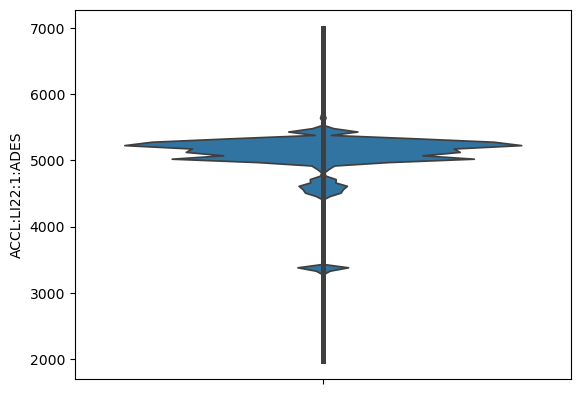

In [14]:
sns.violinplot(data=all_df['ACCL:LI22:1:ADES'], inner="point")

<Axes: xlabel='ACCL:LI21:1:L1S_S_AV', ylabel='Count'>

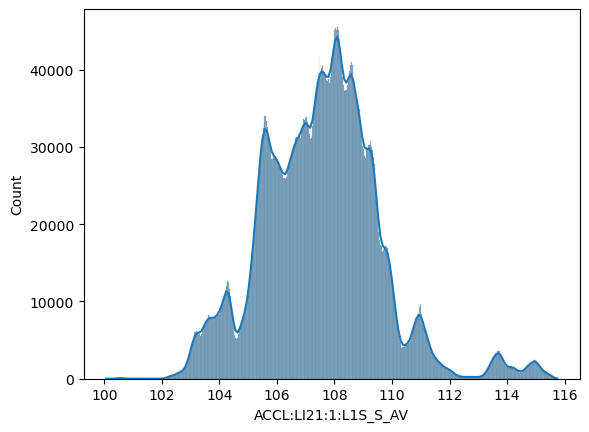

In [15]:
sns.histplot(final_df['ACCL:LI21:1:L1S_S_AV'], kde=True)

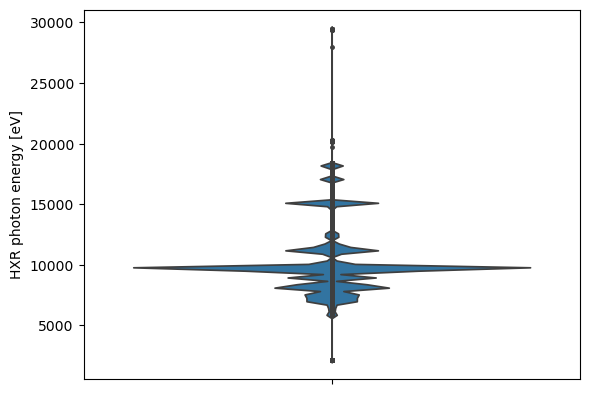

In [16]:
sns.violinplot(data=all_df['HXR photon energy [eV]'], inner="point")
# plt.axhline(y=9.091, color='red', linestyle='--')
plt.show()

## Build NN model with Pytorch

In [17]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from botorch.utils import standardize
from botorch.models.transforms.input import AffineInputTransform, Normalize
import time

In [ ]:
class MyDataset(Dataset):
    def __init__(self, dataframe, input_cols, output_cols):
        self.features = dataframe[input_cols].values
        self.outputs = dataframe[output_cols].values

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        x = torch.tensor(self.features[idx], dtype=torch.float32)
        y = torch.tensor(self.outputs[idx], dtype=torch.float32)
        return x, y

# Split the dataset into training and testing sets
train_df, test_df = train_test_split(final_df, test_size=0.2, random_state=39)

input_mins = final_df[input_cols].min()
input_maxs = final_df[input_cols].max()
output_mins = final_df[output_cols].min()
output_maxs = final_df[output_cols].max()
# Convert means and stds to PyTorch tensors
input_scaler = AffineInputTransform(d=input_size,coefficient=torch.tensor(input_maxs.values-input_mins.values, dtype=torch.float32),
                                                     offset=torch.tensor(input_mins.values, dtype=torch.float32))
output_scaler = AffineInputTransform(d=output_size,coefficient=torch.tensor(output_maxs.values-output_mins.values, dtype=torch.float32),
                                                     offset=torch.tensor(output_mins.values, dtype=torch.float32))

train_df[input_cols] = input_scaler.transform(torch.tensor(train_df[input_cols].values, dtype=torch.float32))
test_df[input_cols] = input_scaler.transform(torch.tensor(test_df[input_cols].values, dtype=torch.float32))
train_df[output_cols] = output_scaler.transform(torch.tensor(train_df[output_cols].values, dtype=torch.float32))
test_df[output_cols] = output_scaler.transform(torch.tensor(test_df[output_cols].values, dtype=torch.float32))

# Create DataLoader instances for training and testing
train_dataset = MyDataset(train_df, input_cols, output_cols)
test_dataset = MyDataset(test_df, input_cols, output_cols)

batch_size = 512

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


### Create model

In [ ]:
def create_model(version: int = 0):
    if version == 0:
        model = nn.Sequential(
            nn.Linear(input_size, 100),
            nn.ELU(),
            nn.Linear(100, 200),
            nn.ELU(),
            nn.Dropout(p=0.05),
            nn.Linear(200, 200),
            nn.ELU(),
            nn.Dropout(p=0.05),
            nn.Linear(200, 100),
            nn.ELU(),
            nn.Dropout(p=0.05),
            nn.Linear(100, 32),
            nn.ELU(),
            nn.Linear(32, 1)
        )
    elif version == 1:
        model = nn.Sequential(
                nn.Linear(input_size, 256),
                nn.Sigmoid(),
                nn.Linear(256, 128),
                nn.Sigmoid(),
                nn.Linear(128, 128),
                nn.Sigmoid(),
                nn.Linear(128, 64),
                nn.Sigmoid(),
                nn.Linear(64, 64),
                nn.Sigmoid(),
                nn.Linear(64, 32),
                nn.Sigmoid(),
                nn.Linear(32, 32),
                nn.Sigmoid(),
                nn.Linear(32, 16),
                nn.Sigmoid(),
                nn.Linear(16, output_size)
        )
    elif version == 2:
        model = nn.Sequential(
                nn.Linear(input_size, 32),
                nn.ReLU(),
                nn.Linear(32, 64),
                nn.ReLU(),
                nn.Dropout(p=0.05),
                nn.Linear(64, 64),
                nn.ReLU(),
                nn.Dropout(p=0.05),
                nn.Linear(64, 32),
                nn.ReLU(),
                nn.Dropout(p=0.05),
                nn.Linear(32, 32),
                nn.ReLU(),
                nn.Linear(32, output_size)
            )
    elif version == 3:
        model = nn.Sequential(
                nn.Linear(input_size, 32),
                nn.Sigmoid(),
                nn.Linear(32, 64),
                nn.Sigmoid(),
                nn.Dropout(p=0.05),
                nn.Linear(64, 64),
                nn.Sigmoid(),
                nn.Dropout(p=0.05),
                nn.Linear(64, 32),
                nn.Sigmoid(),
                nn.Dropout(p=0.05),
                nn.Linear(32, 32),
                nn.Sigmoid(),
                nn.Linear(32, output_size)
            )
    elif version == 4:
        model = nn.Sequential(
                nn.Linear(input_size, 512),
                nn.ELU(),
                nn.Linear(512, 256),
                nn.ELU(),
                nn.Linear(256, 128),
                nn.ELU(),
                nn.Linear(128, 64),
                nn.ELU(),
                nn.Linear(64, 64),
                nn.ELU(),
                nn.Linear(64, 32),
                nn.ELU(),
                nn.Linear(32, 32),
                nn.ELU(),
                nn.Linear(32, 16),
                nn.ELU(),
                nn.Linear(16, output_size)
            )
    elif version == 5:
        model = nn.Sequential(
                nn.Linear(input_size, 512),
                nn.ELU(),
                nn.Linear(512, 256),
                nn.ELU(),
                nn.Linear(256, 128),
                nn.ELU(),
                nn.Dropout(p=0.05),
                nn.Linear(128, 64),
                nn.ELU(),
                nn.Dropout(p=0.05),
                nn.Linear(64, 16),
                nn.ELU(),
                nn.Dropout(p=0.05),
                nn.Linear(16, 16),
                nn.ELU(),
                nn.Linear(16, output_size)
            )
    else:
        raise ValueError(f"Unknown model version {version}.")
    return model.float()

In [16]:
model_version = 5
model = create_model(model_version)

In [17]:
lr = 1e-6
weight_decay = 1e-6
n_epochs = 50
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)

In [ ]:
train_losses, test_losses = [], []
print("{:8s} {:>12s} {:>12s} {:>12s}".format("EPOCH", "TRAIN_LOSS", "TEST_LOSS", "ETA"))
t0 = time.time()
best_loss = torch.inf
for epoch in range(n_epochs):
    for i, data in enumerate(train_loader, 0):
        inputs, targets = data

        
        optimizer.zero_grad()
        model.train()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        
        # l1_regularization = sum(torch.norm(param, 1) for param in model.parameters())
        # total_loss = loss + reg * l1_regularization
        # total_loss.backward()
        loss.backward()
        optimizer.step()

        if i == 0:
            model.eval()
            inputs_test, targets_test = next(iter(test_loader))
            outputs_test = model(inputs_test)
            test_loss = criterion(outputs_test, targets_test)

            # store losses
            train_losses.append(loss.item())
            test_losses.append(test_loss.item())

            # print info
            if epoch % (n_epochs // 10) == 0:
                t_avg = (time.time() - t0) / (epoch + 1)
                t_r = (n_epochs - epoch - 1) * t_avg / 60  # in minutes
                if t_r <= 1.0:
                    t_info = "{:.2f} sec".format(60 * t_r)
                else:
                    t_info = "{:.2f} min".format(t_r)
                info = "{:<8d} {:12.5f} {:12.5f} {:>12s}".format(epoch, loss, test_loss, t_info)
                if test_loss < best_loss:
                    info = "\033[0;32m" + info + '\x1b[0m'                
                print(info)
                
# Plot the training and test losses
plt.figure(figsize=(8, 6))
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.grid(color="gray", linestyle="dashed")
plt.title('Training and Test Loss Evolution')
plt.legend()
plt.show()

EPOCH      TRAIN_LOSS    TEST_LOSS          ETA
0             0.20850      0.20021    50.74 sec
5             0.02271      0.02043   337.96 min
10            0.02173      0.01744   336.50 min
15            0.01709      0.01499   257.00 min


In [28]:
# Function to plot actual vs predicted values
def plot_actual_vs_predicted(actual, predicted, title):
    plt.figure(figsize=(8, 8))
    plt.grid()
    plt.scatter(actual, predicted, color='blue', alpha=0.3)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    r_squared = r2_score(actual, predicted)
    plt.plot([actual.min(), actual.max()], [actual.min(), actual.max()], color='orange', linewidth=3)
    plt.title(title)
    print(f' R\u00b2:{r_squared:.5f}')
    plt.show()

# Evaluate the model on the test set
model.eval()
test_loss = 0.0
predictions = []
actual_values = []

with torch.no_grad():
    for inputs, targets in test_loader:
        outputs = model(inputs)
        test_loss += criterion(outputs, targets).item()

        
        predictions.append(outputs.numpy())
        actual_values.append(targets.numpy())



test_loss /= len(test_loader)

print(f'Test Loss: {test_loss:.4f}')

# Convert lists to NumPy arrays
predictions = np.concatenate(predictions, axis=0)
actual_values = np.concatenate(actual_values, axis=0)

# Calculate R-squared value
# r_squared1 = r2_score(actual_values[:, 0], predictions[:, 0])
# r_squared2 = r2_score(actual_values[:, 1], predictions[:, 1])

# transform the scaled outputs into original ones with sklearn
# predictions = output_scaler.inverse_transform(predictions)
# actual_values = output_scaler.inverse_transform(actual_values)

# transform the scaled outputs into original ones with botorch
predictions = output_scaler._untransform(torch.tensor(predictions))
actual_values = output_scaler._untransform(torch.tensor(actual_values))

# Plot actual vs predicted values for each output
for i, output_col in enumerate(output_cols):
    plot_actual_vs_predicted(actual_values[:, i], predictions[:, i], f'{output_col} - Actual vs Predicted')



AttributeError: 'collections.OrderedDict' object has no attribute 'eval'

In [26]:
file_dir = '/sdf/data/ad/ard/u/zihanzhu/ml/lcls_fel_tuning/dataset/'  
pickle_files = 'hxr_archiver_Jun_2024.pkl'
new_test_df = pd.read_pickle(file_dir+pickle_files)
print('Total test set size:',new_test_df.shape[0])
new_test_df = dataset_filter(new_test_df)[:]
# new_test_df = selected_validation_set
date_selection = 0
if date_selection:
    # Specify the fraction of the dataset to select
    start_time = pd.Timestamp('2024-02-1 00:00:00').tz_localize('US/Pacific')
    end_time = pd.Timestamp('2024-02-10 00:00:00').tz_localize('US/Pacific')
    # when we will look into the specific time frame
    new_test_df = new_test_df[(new_test_df.index >= start_time) & (new_test_df.index <= end_time)]
    
print('Number of effective samples in test set:', new_test_df.shape[0])

# input_cols_bctrl = quads_inj_bctrl + quads_linac_bctrl + quads_ltuh_bctrl + beam_status
output_cols = ['hxr_pulse_intensity']
# Calculate moving average with a window
window_size = 100
moving_avg = new_test_df[output_cols].rolling(window=window_size).mean()

# Display the original data and the moving average
# new_test_df_updated = new_test_df.copy()
new_test_df['moving_avg'] = moving_avg

sample_interval = 10
indices = np.round(np.arange(0,new_test_df.shape[0] - 1,sample_interval))[:]
# ----------------------
# num_samples_to_plot = 100
# indices = np.random.randint(0, new_test_df.shape[0] - 1, num_samples_to_plot)
# --------------------------
print('Number of samples for model validation:', indices.shape[0])
num_samples_to_plot = indices.shape[0]
ground_truth = new_test_df[output_cols].iloc[indices].values
ground_truth_moving_avg = new_test_df['moving_avg'].iloc[indices].values

Total test set size: 1855082
Number of effective samples in test set: 239889
Number of samples for model validation: 23989


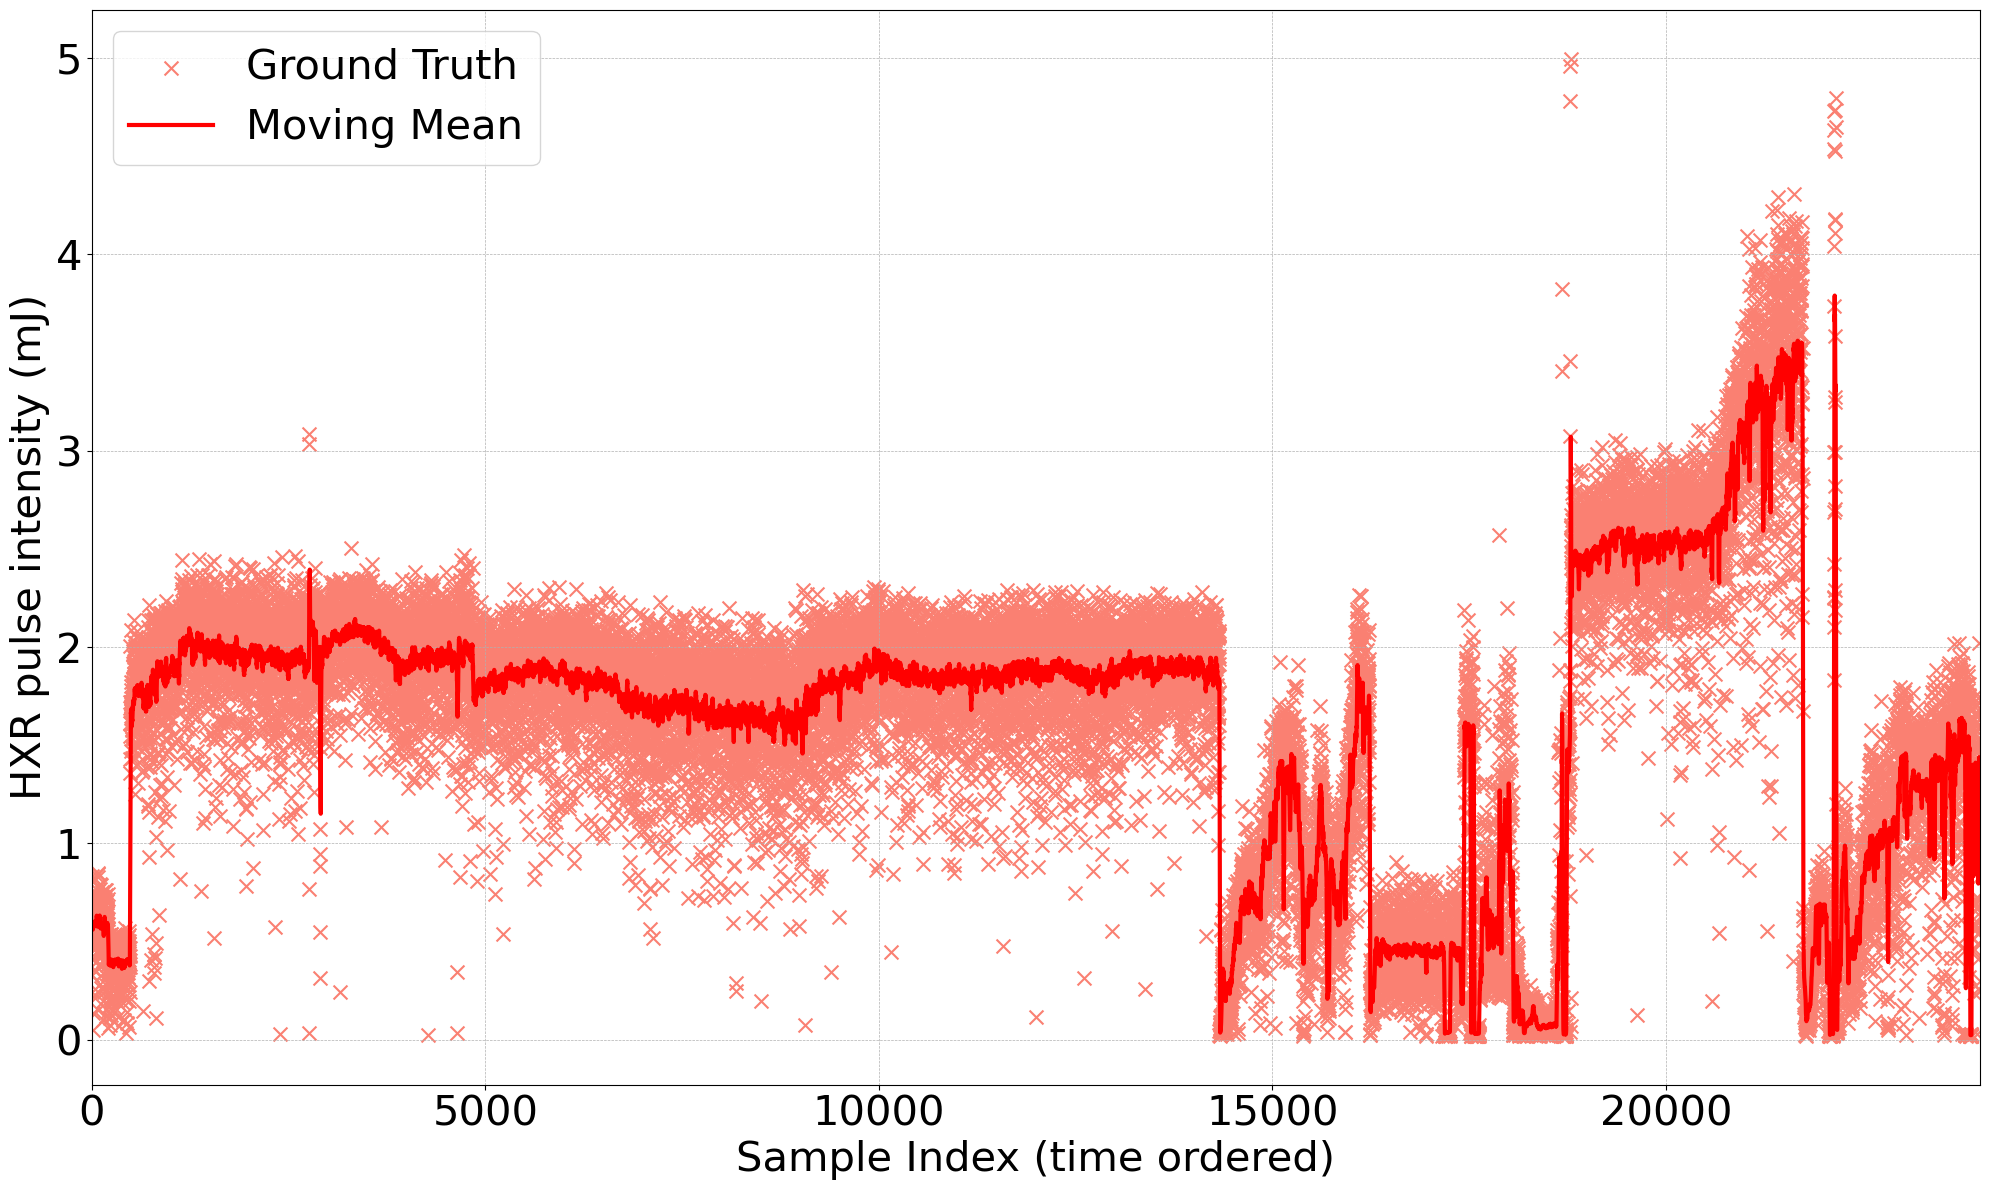

In [27]:
shot_axis = np.arange(len(ground_truth))
plt.figure(figsize=(20,12))
plt.scatter(shot_axis, ground_truth, label='Ground Truth', color='salmon', marker='x',s=100)
plt.plot(ground_truth_moving_avg, label='Moving Mean', color='red', linewidth=3)
fontsize = 30
plt.xlabel('Sample Index (time ordered)', fontsize=fontsize)
plt.ylabel('HXR pulse intensity (mJ)',fontsize=fontsize)
plt.xlim([0, num_samples_to_plot])
# plt.ylim([-0, 3])
plt.legend(fontsize=fontsize)
plt.tick_params(labelsize=fontsize)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

In [91]:
# Assuming 'model' is your Sequential model
all_float32 = True  # Flag to check if all parameters are float32

for name, param in model.named_parameters():
    if param.dtype != torch.float32:
        print(f"Parameter {name} is of type {param.dtype}")
        all_float32 = False

if all_float32:
    print("All parameters are of type float32.")
else:
    print("Some parameters are not of type float32.")

Parameter 0.weight is of type torch.float64
Parameter 0.bias is of type torch.float64
Parameter 2.weight is of type torch.float64
Parameter 2.bias is of type torch.float64
Parameter 4.weight is of type torch.float64
Parameter 4.bias is of type torch.float64
Parameter 7.weight is of type torch.float64
Parameter 7.bias is of type torch.float64
Parameter 10.weight is of type torch.float64
Parameter 10.bias is of type torch.float64
Parameter 13.weight is of type torch.float64
Parameter 13.bias is of type torch.float64
Parameter 15.weight is of type torch.float64
Parameter 15.bias is of type torch.float64
Some parameters are not of type float32.


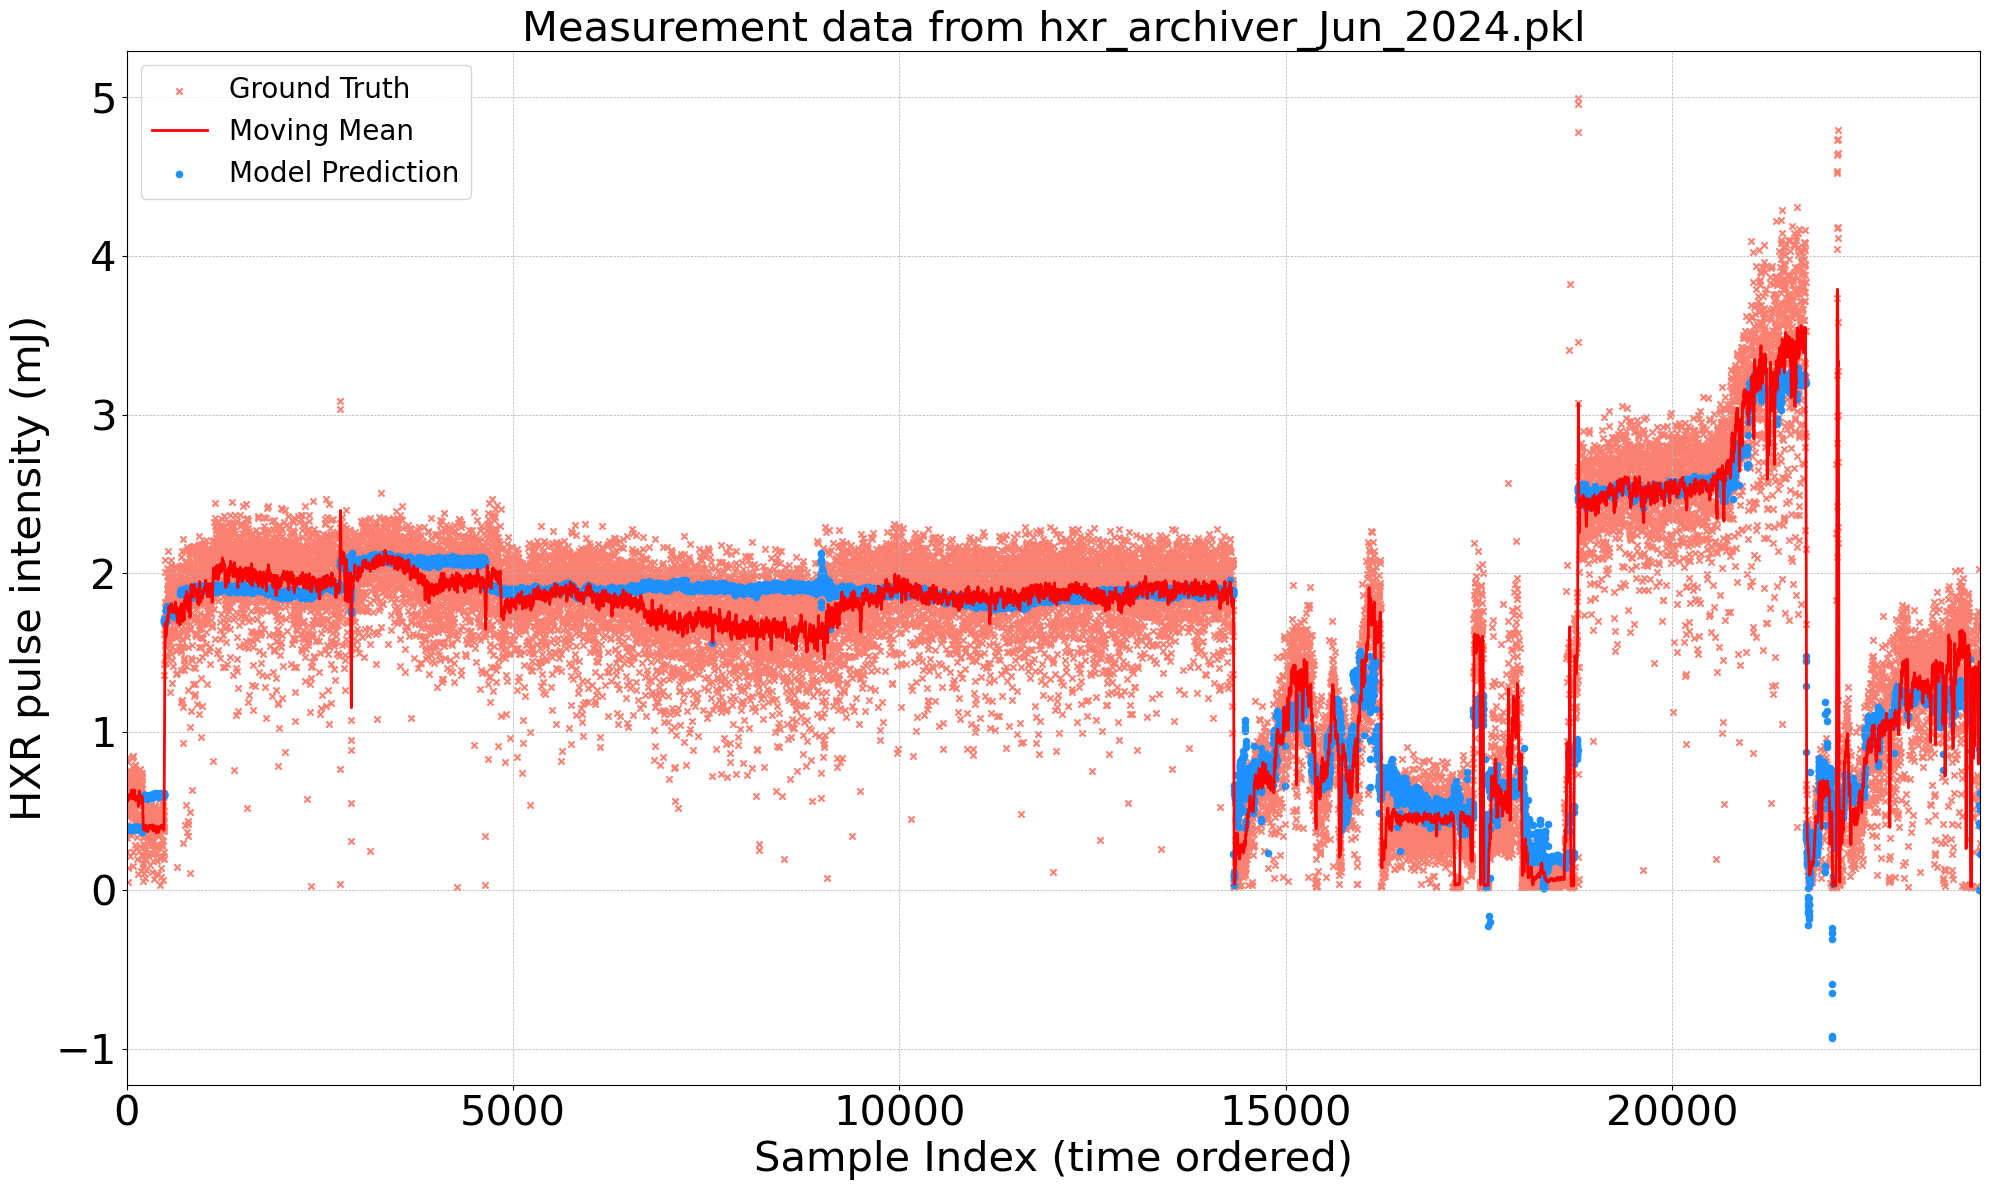

In [95]:
fontsize = 30
plt.figure(figsize=(20,12))
shot_axis = np.arange(len(ground_truth))
# Ground truth and predictions for the selected a subset
scaled_inputs = input_scaler.transform(torch.tensor(new_test_df[input_cols].iloc[indices].values.astype('float32'), dtype=torch.float32)) # for botorch
# Pass the scaled inputs through your model
model_outputs = model(scaled_inputs)

# Inverse transform the model outputs using the output_scaler
# final_output = output_scaler.inverse_transform(model_outputs.detach().numpy()) # for sklearn
final_prediction = output_scaler._untransform(model_outputs).detach().numpy() # for botorch 

plt.scatter(shot_axis, ground_truth, label='Ground Truth', color='salmon', marker='x',s=20)
# plt.scatter(shot_axis, new_mean_predictions_loaded2, label='Model2 prediction', color='yellowgreen', marker='o', s=100)

plt.plot(ground_truth_moving_avg, label='Moving Mean', color='red', linewidth=2)
plt.scatter(shot_axis, final_prediction[:,0], label='Model Prediction', color='dodgerblue', marker='o', s=20)
    
# lower_bound2 = (new_mean_predictions_loaded2 - 2 * new_std_predictions_loaded2).numpy().flatten()
# upper_bound2 = (new_mean_predictions_loaded2 + 2 * new_std_predictions_loaded2).numpy().flatten()
# plt.fill_between(range(num_samples_to_plot), lower_bound2, upper_bound2, color='yellowgreen', alpha=0.3)

plt.xlabel('Sample Index (time ordered)', fontsize=fontsize)
plt.ylabel('HXR pulse intensity (mJ)',fontsize=fontsize)
plt.title(f'Measurement data from {pickle_files}',fontsize=fontsize)
plt.xlim([0, num_samples_to_plot])
# plt.ylim([0, 2.2])
plt.legend(fontsize=20, loc='upper left')
plt.tick_params(labelsize=fontsize)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

plt.show()

In [21]:
# Save the model
model_path = '/sdf/data/ad/ard/u/zihanzhu/ml/lcls_fel_tuning/model/'
nn_folder_name = datetime.now().strftime("%Y-%m-%d_%H-%M-%S") + '_nn/'
nn_path = os.path.join(model_path, nn_folder_name)

# Create directory if it does not exist
if not os.path.exists(nn_path):
    os.makedirs(nn_path)

torch.save(input_scaler, nn_path + 'lcls_fel_input_scaler.pt')
torch.save(output_scaler, nn_path + 'lcls_fel_output_scaler.pt')
torch.save(model, nn_path + 'lcls_fel_model.pt')

file_name = 'feature_config.yml'
yaml_dump = variables_as_yaml(input_variables, output_variables, nn_path+file_name)

print(f"Model and scalers saved in: {nn_folder_name}")

Model and scalers saved in: 2025-02-26_09-56-03_nn/


# Model response to 1D variable scan 

### Load model

In [92]:
# Specify the path to the saved files
model_path = '/sdf/data/ad/ard/u/zihanzhu/ml/lcls_fel_tuning/model/'
model_version = '2025-03-14_02-26-58_nn/'
loaded_model_path = model_path + model_version + 'final_lcls_fel_model.pt'
loaded_input_scaler_path = model_path + model_version + 'lcls_fel_input_scaler.pt'
loaded_output_scaler_path = model_path + model_version + 'lcls_fel_output_scaler.pt'

# Load the model state dictionary
# model = torch.load(loaded_model_path)
# model = model.float()
# model = create_model(5)

# 2. Load the state dict
# state_dict = torch.load(loaded_model_path)

# 3. Load the state dict into your model
# model.load_state_dict(state_dict)

model = torch.load(loaded_model_path).to(torch.float32)
# Load the model state dictionary
input_scaler = torch.load(loaded_input_scaler_path)
output_scaler = torch.load(loaded_output_scaler_path)



# Extract input and output columns
parsed_variables = parse_pv_yml(model_path + model_version + 'feature_config.yml')
input_cols = parsed_variables['input_variables'].keys()
output_cols = parsed_variables['output_variables'].keys()

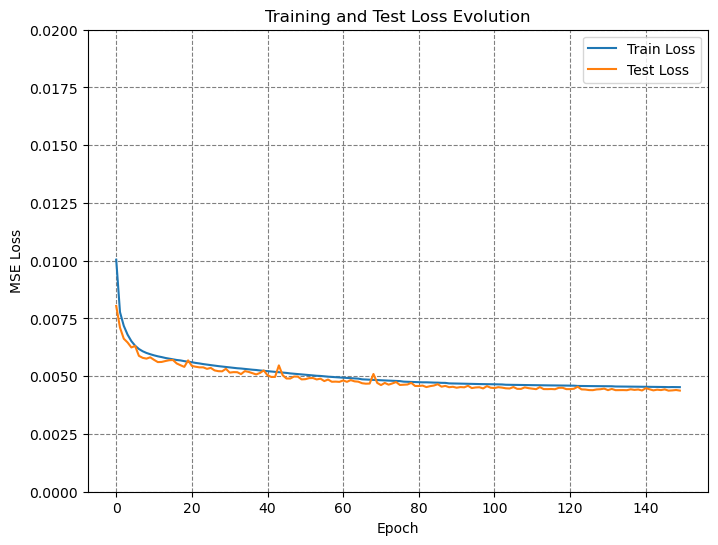

In [87]:
test_losses = np.load(model_path + model_version + 'test_losses.npy')
train_losses = np.load(model_path + model_version + 'train_losses.npy')
# Plot the training and test losses
plt.figure(figsize=(8, 6))
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.grid(color="gray", linestyle="dashed")
plt.title('Training and Test Loss Evolution')
plt.ylim([0,0.02])
plt.legend()
plt.show()

### Create a LUME model to wrap input, output transformers and neural network intor TorchModule

In [88]:
# create TorchModel
lume_model = TorchModel(
    model=model,
    input_variables=input_cols,
    output_variables=output_cols,
    input_transformers=[input_scaler],
    output_transformers=[output_scaler],
)



In [89]:
# wrap in TorchModule
lume_module = TorchModule(
    model=lume_model,
    input_order=lume_model.input_names,
    output_order=lume_model.output_names,
)

lume_module

TorchModule(
  (base_model): Sequential(
    (0): Linear(in_features=143, out_features=512, bias=True)
    (1): ELU(alpha=1.0)
    (2): Linear(in_features=512, out_features=256, bias=True)
    (3): ELU(alpha=1.0)
    (4): Linear(in_features=256, out_features=128, bias=True)
    (5): ELU(alpha=1.0)
    (6): Dropout(p=0.05, inplace=False)
    (7): Linear(in_features=128, out_features=64, bias=True)
    (8): ELU(alpha=1.0)
    (9): Dropout(p=0.05, inplace=False)
    (10): Linear(in_features=64, out_features=16, bias=True)
    (11): ELU(alpha=1.0)
    (12): Dropout(p=0.05, inplace=False)
    (13): Linear(in_features=16, out_features=16, bias=True)
    (14): ELU(alpha=1.0)
    (15): Linear(in_features=16, out_features=1, bias=True)
  )
  (input_transformers_0): AffineInputTransform()
  (output_transformers_0): AffineInputTransform()
)

IndexError: list index out of range

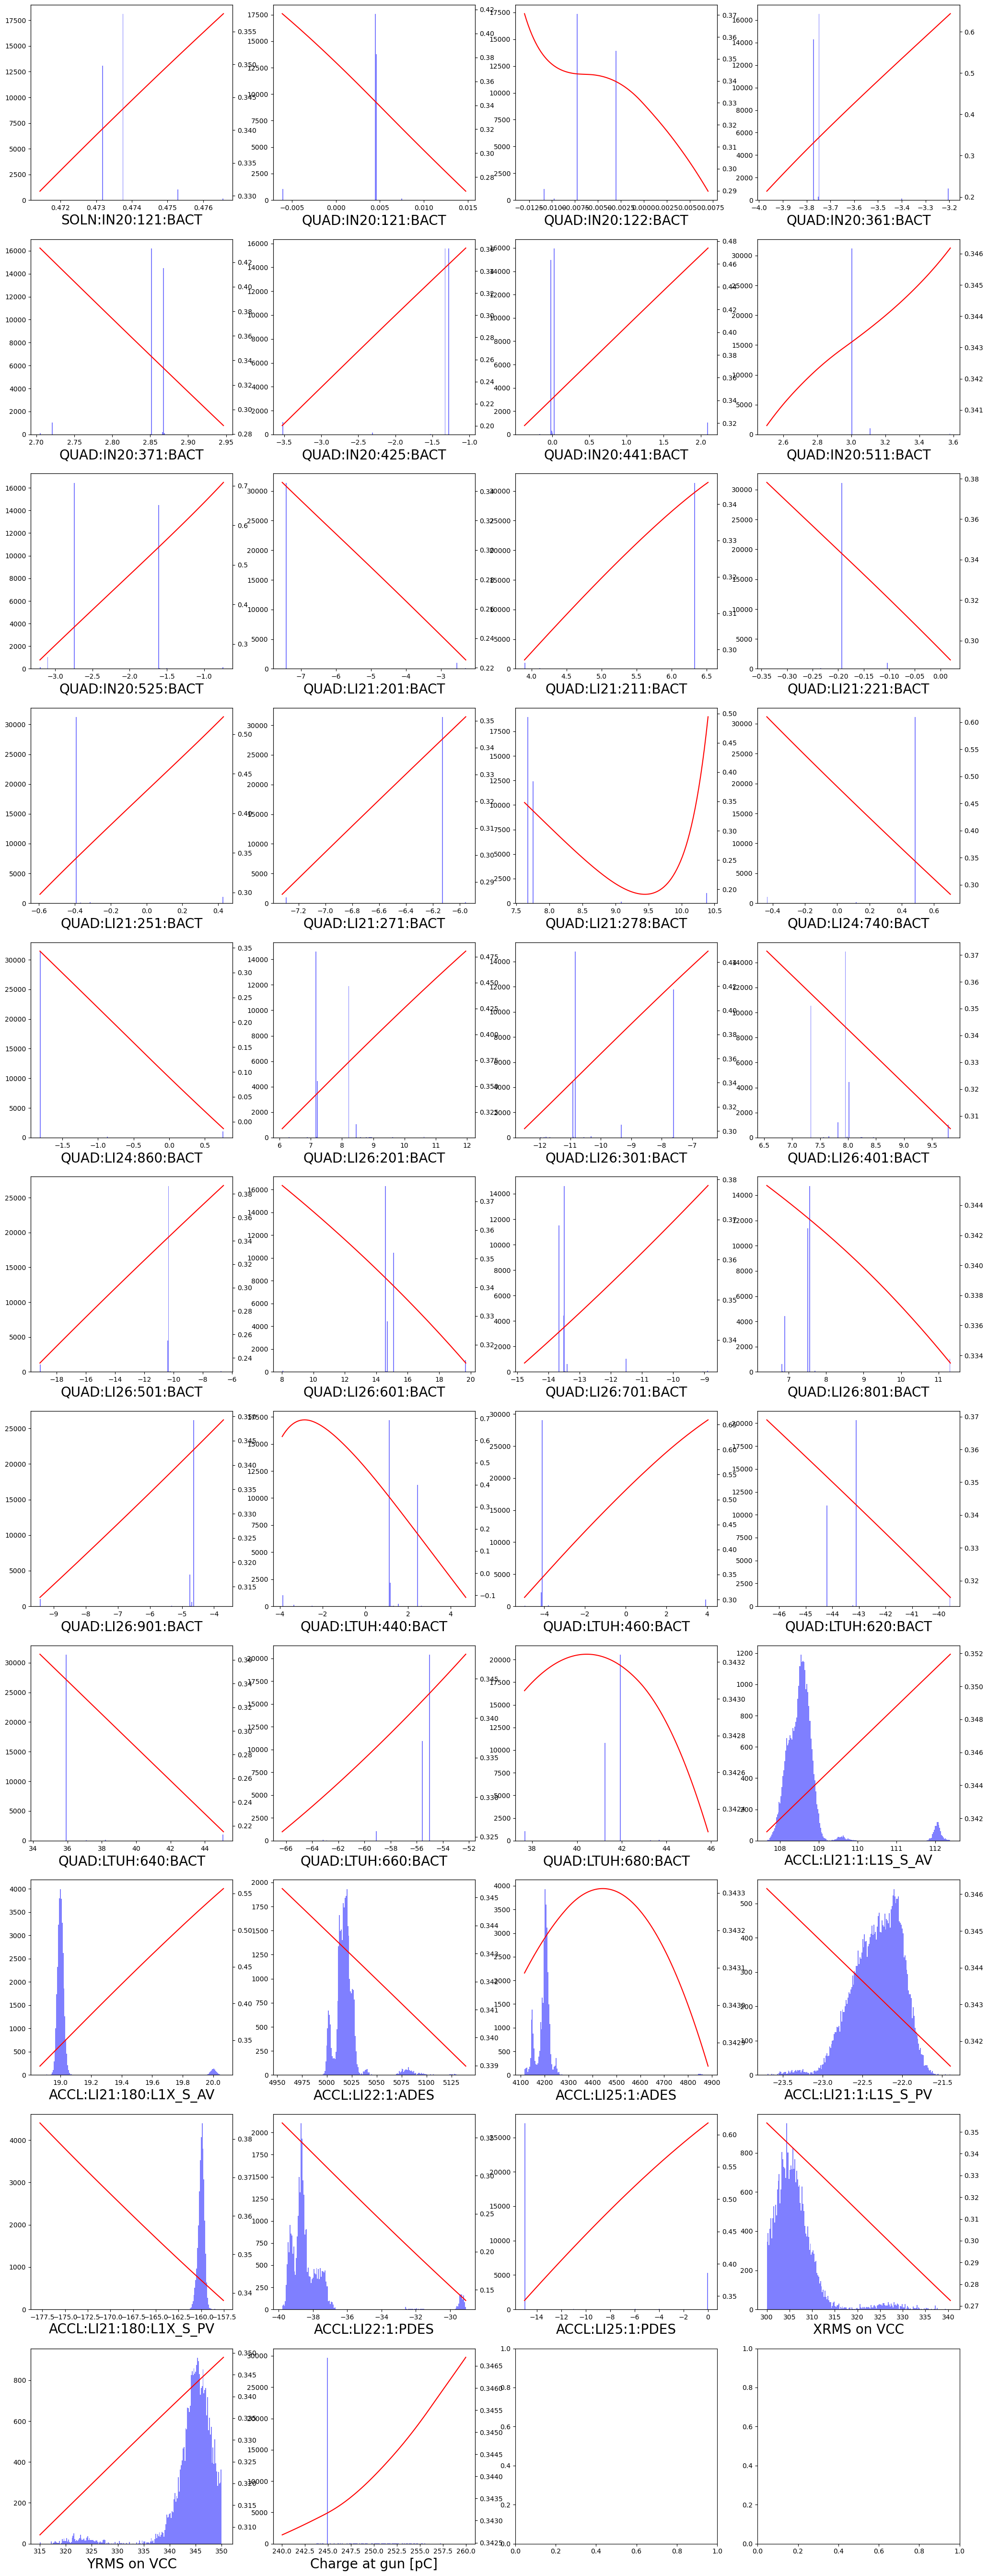

In [57]:
nrows, ncols = 11, 4
figsize = (25, 25 * nrows / ncols)

fig, ax1 = plt.subplots(nrows=nrows, ncols=ncols, sharey=False, figsize=figsize)


for i in range(nrows * ncols):
    ax_i = ax1[i // ncols, i % ncols]
    column_name = input_cols[i].name
    lower_limit = np.percentile(final_df[column_name], 0)
    upper_limit = np.percentile(final_df[column_name], 100)
    step = (upper_limit - lower_limit) / 100  # define your step size
    
    median_row = pd.DataFrame(final_df.median()).transpose()
    # Create an empty DataFrame to store the results
    scanned_df = pd.DataFrame(columns=final_df.columns)
    
    # Iterate over the range of values you want for the specific column
    for i, value in enumerate(np.arange(lower_limit, upper_limit + step, step)):
        # Create a copy of the original DataFrame
        new_row = median_row.copy()
        
        # Modify the specific column with the current value
        new_row.at[0, column_name] = value  

        scanned_df = pd.concat([scanned_df, new_row], ignore_index=True)
    
        # # Transform the input data using the input_scaler
        # # scaled_inputs = torch.from_numpy(input_scaler.transform(scanned_df[input_cols].values)).float() # for sklearn
        # scaled_inputs = input_scaler.transform(torch.tensor(scanned_df[input_cols].values.astype('float32'), dtype=torch.float32)) # for botorch
        # # Pass the scaled inputs through your model
        # model_outputs = model(scaled_inputs)
        # # Inverse transform the model outputs using the output_scaler
        # # final_output = output_scaler.inverse_transform(model_outputs.detach().numpy()) # for sklearn
        # final_output = output_scaler._untransform(model_outputs).detach().numpy() # for botorch  

        final_output = lume_module(torch.tensor(scanned_df[lume_model.input_names].values))
    ax_i.hist(final_df[column_name], bins=200, color="blue", alpha=0.5)
    ax2 = ax_i.twinx()
    ax2.plot(scanned_df[column_name], final_output, color="red")
    ax_i.set_xlabel(column_name, fontsize=20)
    ax_i.tick_params(axis='x', labelsize=10)
    # if i % ncols == 0:
        # ax_i.set_ylabel("HXR pulse intensity")
    
fig.tight_layout()
